In [1]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import os
import matplotlib.pyplot as plt

In [2]:
# Paths to the input shapefile and raster file
shapefile_path = r'D:\omar\Videos_Youtube\Hydrotools\Berlin_Bezirksgrenzen_-2292027283764261881\Berlin_Bezirke.shp'
raster_path = r'D:\omar\Videos_Youtube\Hydrotools\Predictive_Features_resolution_30_m\DEM.tif'

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)


# Open the raster file
raster = rasterio.open(raster_path)
raster_crs = raster.crs
raster_bounds = raster.bounds

In [3]:
shapefile_crs = shapefile.crs
print(f"Shapefile CRS: {shapefile_crs}")
print(f"Raster CRS: {raster_crs}")

if shapefile_crs != raster_crs:
    print("CRS do not match. Reprojecting shapefile to raster CRS.")
    shapefile = shapefile.to_crs(raster_crs)
else:
    print("CRS match. No reprojecting needed.")


Shapefile CRS: EPSG:3857
Raster CRS: EPSG:25833
CRS do not match. Reprojecting shapefile to raster CRS.


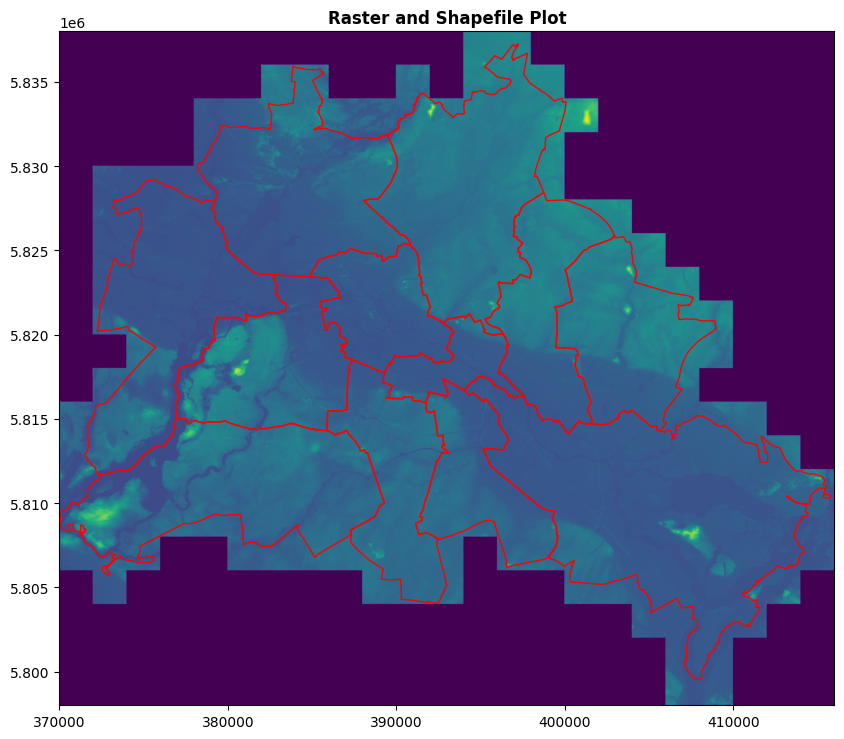

In [4]:
# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the raster
show(raster, ax=ax, title="Raster and Shapefile Plot")

# Plot the shapefile
shapefile.plot(ax=ax, facecolor='none', edgecolor='red')

# Show the plot
plt.show()


In [5]:
shapefile

,Gemeinde_n,Gemeinde_s,Land_name,Land_schlu,Schluessel,geometry
0,Reinickendorf,012,Berlin,11,11000012,"POLYGON ((386338.953 5832057.893, 386319.074 5..."
1,Charlottenburg-Wilmersdorf,004,Berlin,11,11000004,"POLYGON ((386099.256 5820697.61, 386093.563 58..."
2,Treptow-Köpenick,009,Berlin,11,11000009,"POLYGON ((403319.206 5805458.586, 403341.627 5..."
3,Pankow,003,Berlin,11,11000003,"POLYGON ((394016.276 5833613.518, 394041.437 5..."
4,Neukölln,008,Berlin,11,11000008,"POLYGON ((395315.327 5816177.338, 395309.189 5..."
5,Lichtenberg,011,Berlin,11,11000011,"POLYGON ((399691.997 5814812.235, 399725.46 58..."
6,Marzahn-Hellersdorf,010,Berlin,11,11000010,"POLYGON ((405800.726 5814456.49, 405809.003 58..."
7,Spandau,005,Berlin,11,11000005,"POLYGON ((380099.688 5824933.073, 380081.665 5..."
8,Steglitz-Zehlendorf,006,Berlin,11,11000006,"POLYGON ((385842.95 5814307.838, 385814.3 5814..."
9,Mitte,001,Berlin,11,11000001,"POLYGON ((389996.263 5824663.813, 389991.314 5..."


In [6]:
def clip_raster_with_shapefile(shapefile_path, raster_path, output_dir, column_name):
    """
    Clips a raster file with each feature in a shapefile and saves the resulting
    rasters with filenames based on a specified attribute column.

    Parameters:
    shapefile_path (str): Path to the input shapefile.
    raster_path (str): Path to the input raster file.
    output_dir (str): Directory to save the clipped raster files.
    column_name (str): Name of the column in the shapefile attribute table to use for filenames.

    Returns:
    None
    """
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Read the shapefile
    shapefile = gpd.read_file(shapefile_path)

    # Open the raster file
    with rasterio.open(raster_path) as raster:
        raster_crs = raster.crs
        
        # Reproject the shapefile to match the raster's CRS if necessary
        if shapefile.crs != raster_crs:
            shapefile = shapefile.to_crs(raster_crs)
        
        for index, row in shapefile.iterrows():
            # Get the geometry of the current feature
            geometry = [row['geometry']]
            
            # Clip the raster using the current feature geometry
            out_image, out_transform = mask(raster, geometry, crop=True)
            
            # Update the metadata
            out_meta = raster.meta.copy()
            out_meta.update({
                "driver": "GTiff",
                "height": out_image.shape[1],
                "width": out_image.shape[2],
                "transform": out_transform
            })
            
            # Construct the output file path
            output_filename = f"{row[column_name]}.tif"
            output_path = os.path.join(output_dir, output_filename)
            
            # Save the clipped raster
            with rasterio.open(output_path, "w", **out_meta) as dest:
                dest.write(out_image)

    print("Clipping and saving completed.")

# Example usage:
shapefile_path = r'D:\omar\Videos_Youtube\Hydrotools\Berlin_Bezirksgrenzen_-2292027283764261881\Berlin_Bezirke.shp'
raster_path = r'D:\omar\Videos_Youtube\Hydrotools\Predictive_Features_resolution_30_m\DEM.tif'
output_dir = r'D:\omar\Videos_Youtube\Hydrotools\Clipped_Rasters'
column_name = 'Gemeinde_n'

clip_raster_with_shapefile(shapefile_path, raster_path, output_dir, column_name)


Clipping and saving completed.
